In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
nader = np.fromfile('/Users/nams/Downloads/det_out_v2',dtype=np.float32)

In [6]:
nader.shape


(1280000,)

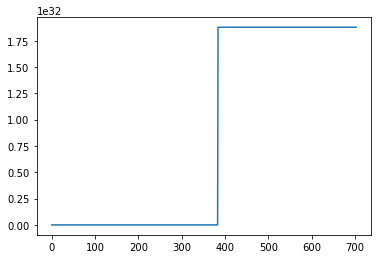

In [7]:
plt.plot(nader)

In [12]:
nader = np.fromfile('/Users/nams/Downloads/det_out_no_ring_buffer',dtype=np.float32)

In [13]:
nader.shape

(1280000,)

<IPython.core.display.Javascript object>


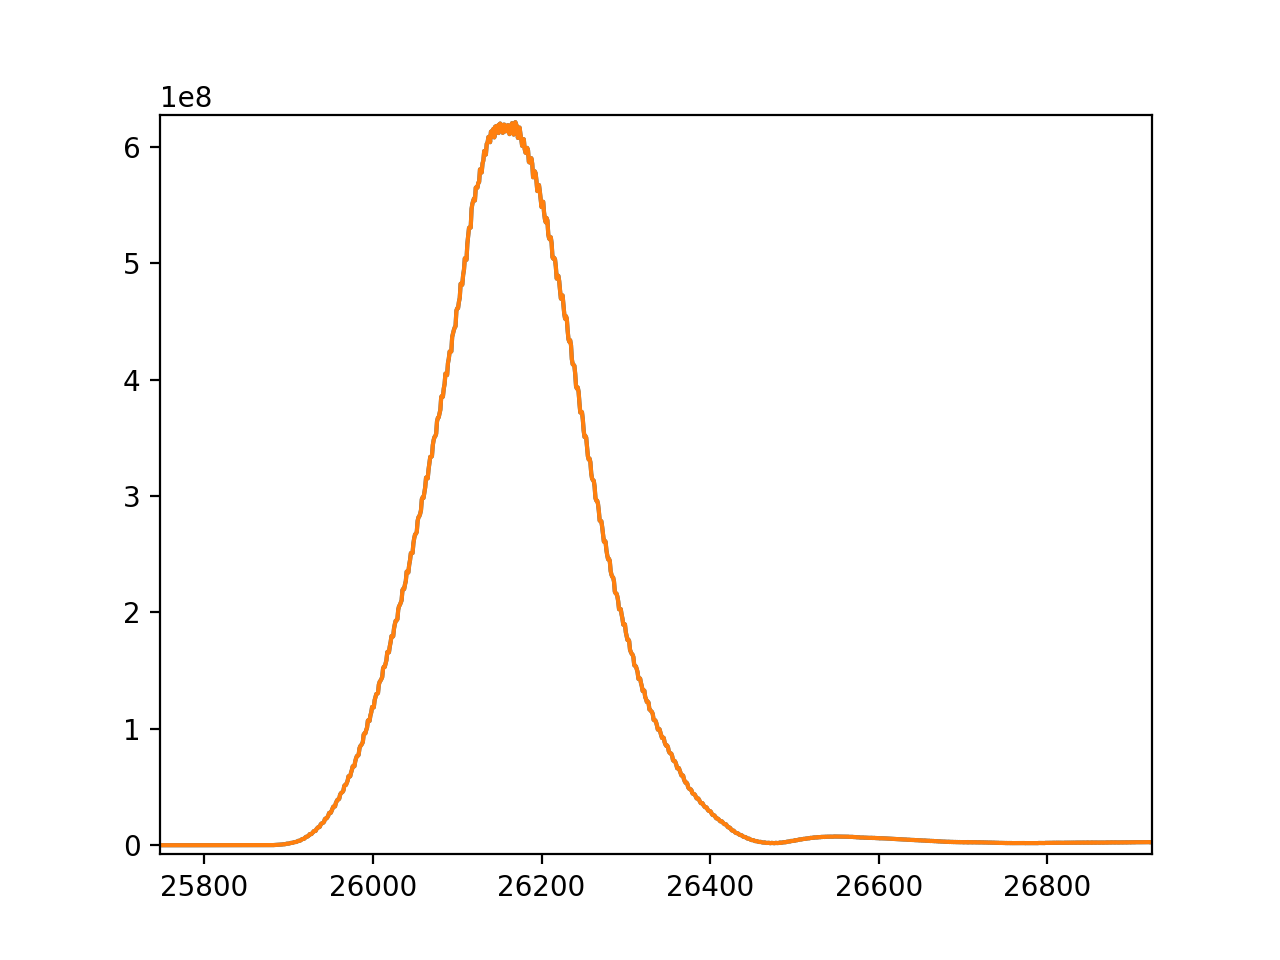

In [15]:
%matplotlib notebook 
plt.plot(nader)

In [17]:
goertzel = np.fromfile('/Users/nams/Documents/projects/gburg-ultrasonic/zmq/filter.out', dtype=np.double)

In [18]:
nader-goertzel

array([  0.        ,   0.        ,   0.        , ..., 318.66869323,
       504.190941  , 401.47408168])

<IPython.core.display.Javascript object>


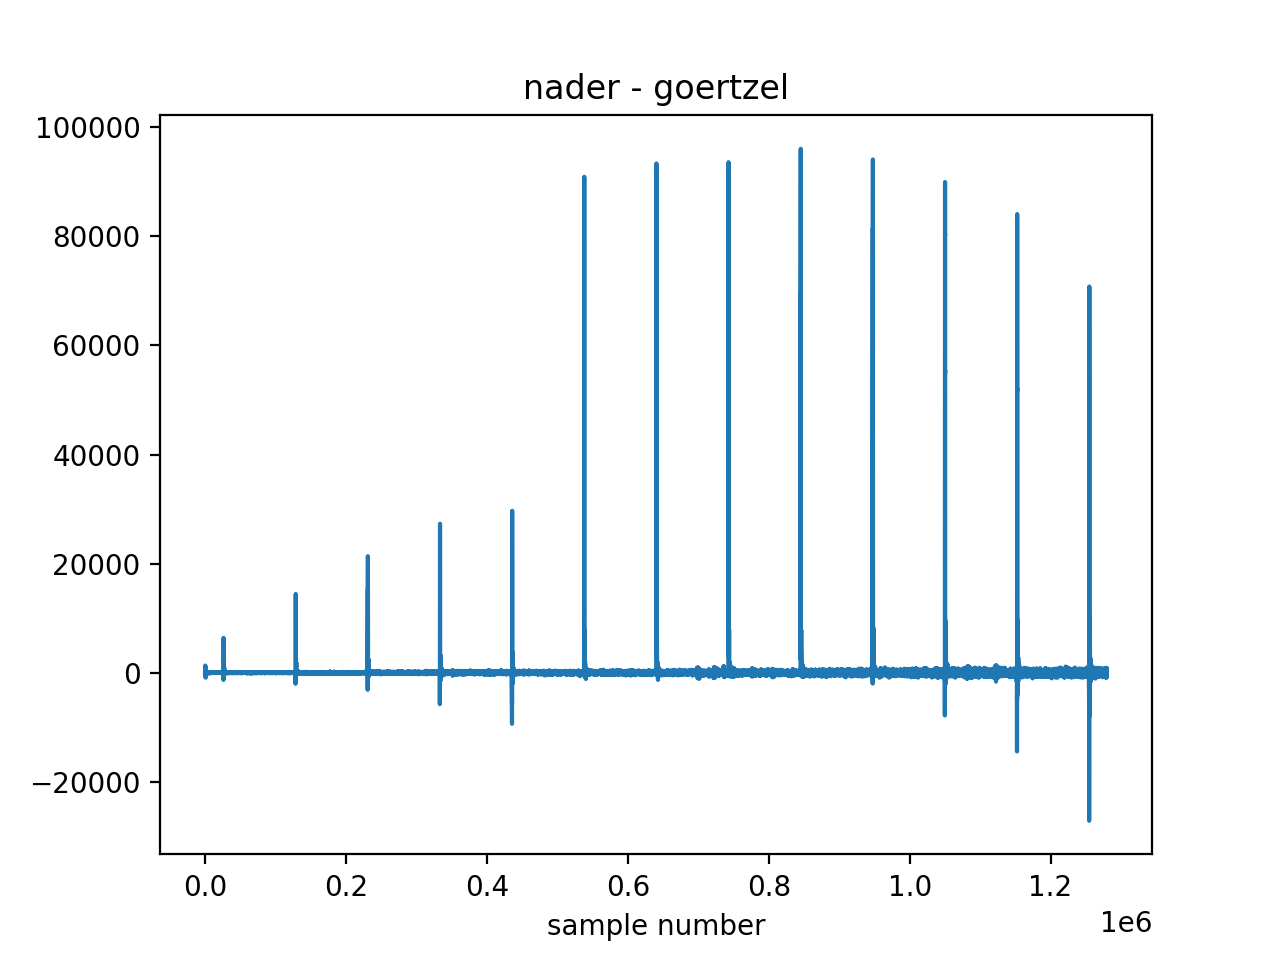

Text(0.5, 0, 'sample number')

In [28]:
plt.figure();
plt.plot(nader-goertzel)
plt.title('nader - goertzel')
plt.xlabel('sample number')

In [22]:
d = nader-goertzel

In [23]:
d[:100]

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,  -1.09874059,  11.3467477 ,
         9.2850658 ,  22.60611105,  24.39107956,  15.20955056,
        22.10145083,   6.42149553,  24.86542642,  16.60983813,
        11.56680369,  55.63565281,   8.14462298,  43.59015018,
        50.47497183,  22.39830658,  60.13328454,  21.68301496,
        47.91528565,  70.98136878,  12.62787865,  88.55504644,
        25.13378343,  52.85772286,  80.24353823,  -2.26807237,
        87.40668288,  28.75385374,  36.81401834, 111.68830016,
         1.67501304, 105.36012894,  47.70900398,  28.64651514,
       128.06802361,   5.44589034, 109.81050375,  74.85102487,
        11.559119  , 133.0916312 ,  11.5201588 ,  94.1413608 ,
       108.87979439,   4.97415937, 165.42492345,  44.77009413,
        86.84879788, 155.41653112,  10.21292838, 164.97202975,
        68.96251918,  66.22995458, 192.83227031,  15.78089821,
       181.22472781, 146.72597837,  61.28782648, 235.59

In [29]:
import scipy.signal

In [71]:
idx = scipy.signal.find_peaks((2*goertzel)**0.5, width=24, height=1e4)[0]

<IPython.core.display.Javascript object>


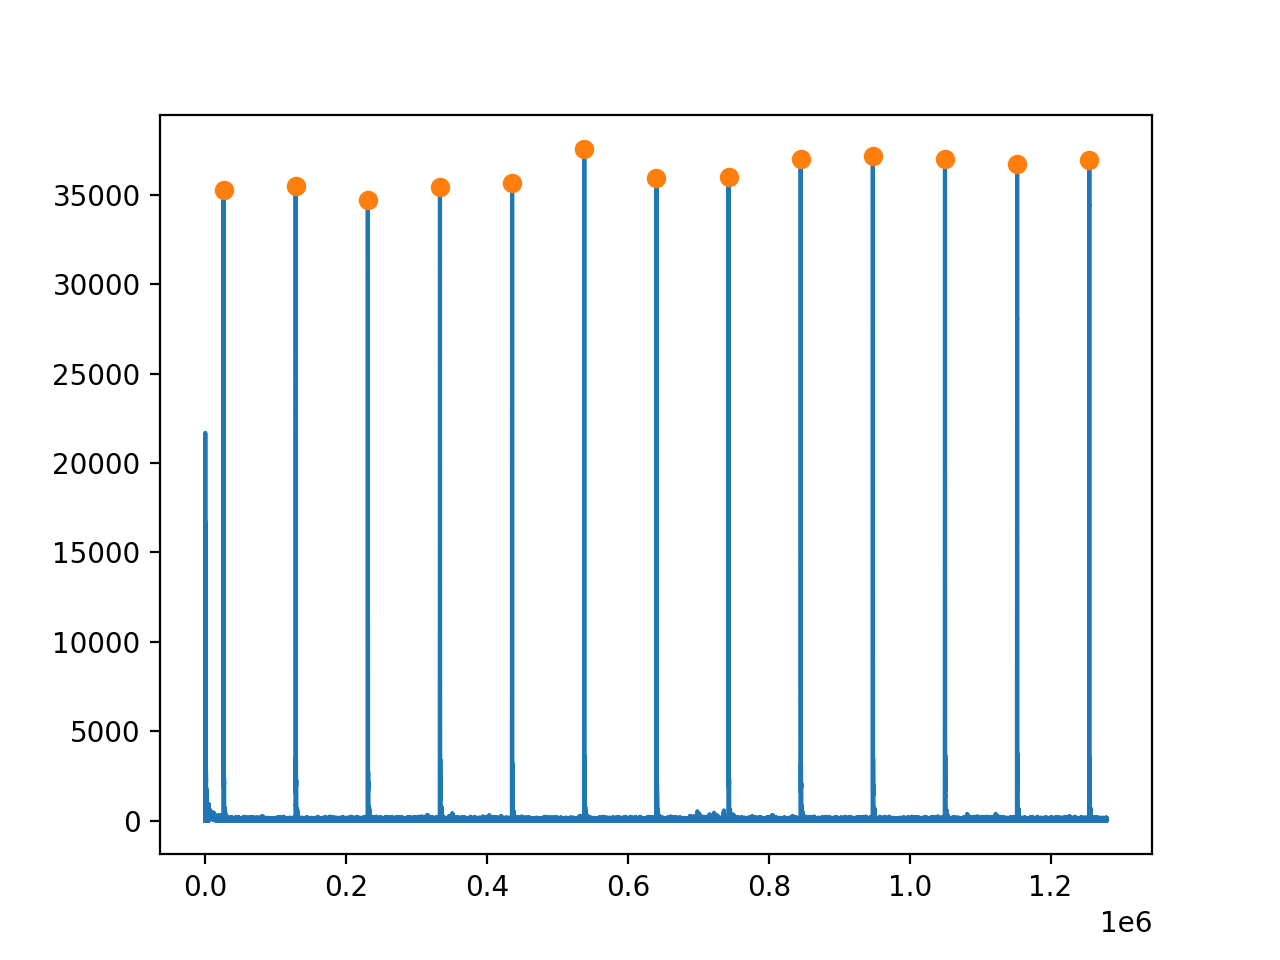

In [72]:
plt.figure()
plt.plot((2*goertzel)**0.5)
plt.plot(idx, ((2*goertzel)**0.5)[idx],'o')

In [73]:
filename = '/Users/nams/Downloads/Fulldata_initiator_19delay.dat'
#filename = '/Users/nams/Downloads/Fulldata_initiator_9delay.dat'


def load_file(filename):
    data = np.loadtxt(filename, dtype=int, delimiter=",")
    data = np.array(data)
    d = data.flatten()
    return d


In [74]:
d = load_file(filename)

In [75]:
def sg(x, k=25*4):
    Pxx = []
    N = 64*4
    # k = 26*4
    w = 2*np.pi*k/N;
    cw = np.cos(w);
    c = 2*cw;
    sw = np.sin(w);
    # Initialize... no sliding because there aren't enough samples
    z1=0;
    z2=0;
    for idx in range(N):
        z0 = x[idx] + c*z1 -z2;
        z2 = z1;
        z1 = z0;

    # I = cw*z1 -z2;
    # Q = sw*z1;

    P = z2*z2 + z1*z1 - c * z1*z2
    print('P',P)
    Pxx.append(P)
    # return I, Q, P

    while (idx < (len(x)-1)):
        idx += 1
        z0 = x[idx] - x[idx-N] + c*z1 -z2;
        z2 = z1;
        z1 = z0;

        P = z2*z2 + z1*z1 - c * z1*z2
        Pxx.append(P)

    return np.array(Pxx)

In [76]:
filtered = sg(d)

P 431.5128633026124


<IPython.core.display.Javascript object>


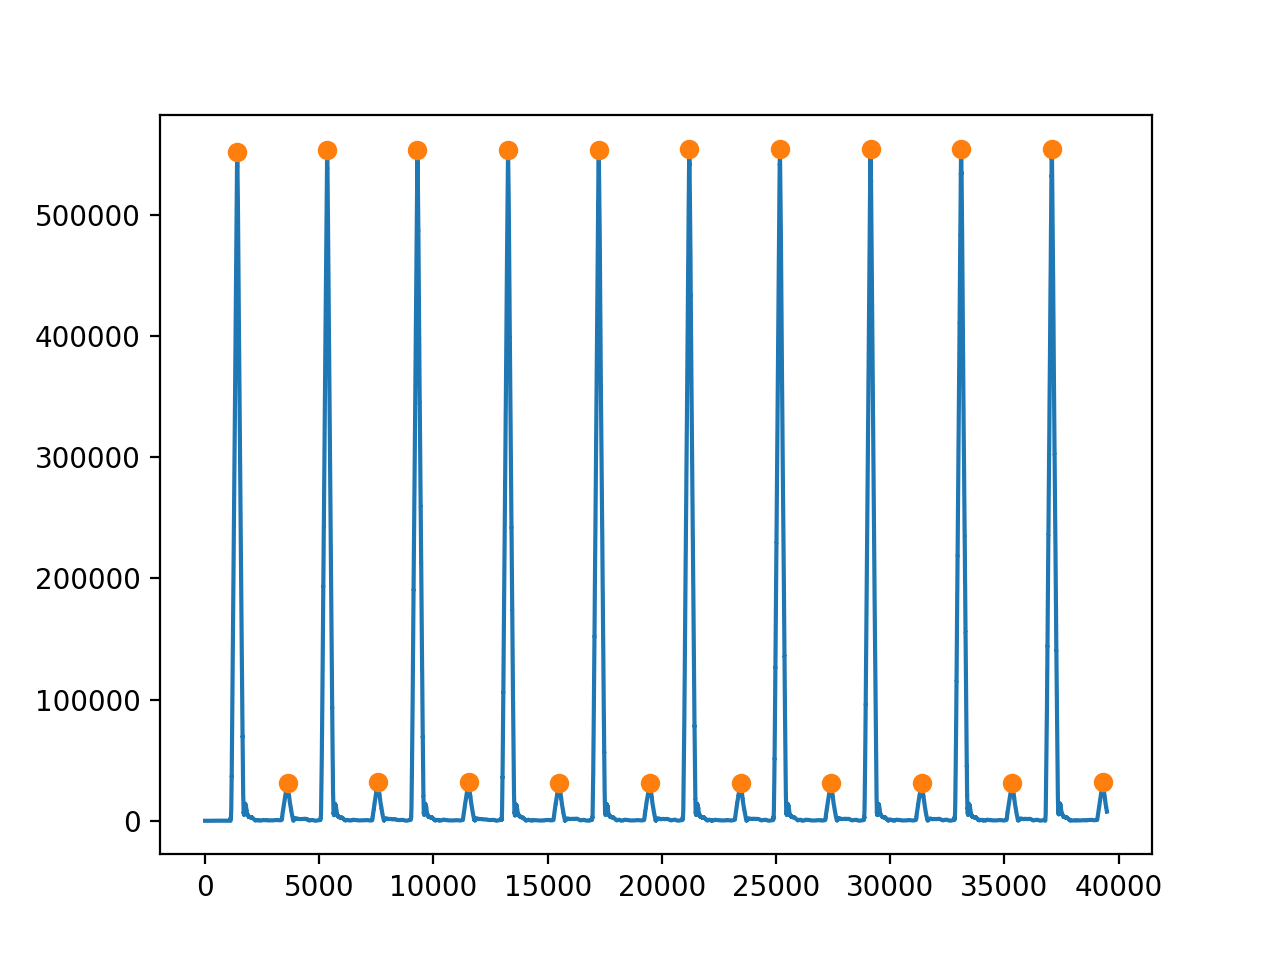

In [122]:
idx = scipy.signal.find_peaks((2*filtered)**0.5, width=128, threshold=10, height=3e3)[0]
plt.figure()
plt.plot((2*filtered)**0.5)
plt.plot(idx, ((2*filtered)**0.5)[idx],'o')

In [123]:
nader = np.fromfile('/Users/nams/Downloads/det_out_no_ring_buffer',dtype=np.float32)
nader2 = np.fromfile('/Users/nams/Documents/projects/gburg-ultrasonic/C/nader2.out', dtype=np.float32)

In [124]:
nader[:10], nader2[:10]

(array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 7.5342400e+07, 3.7340540e+07, 1.3845386e+08,
        4.8841824e+07, 8.6300888e+07], dtype=float32),
 array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 7.5342400e+07, 3.7340540e+07, 1.3845386e+08,
        4.8841824e+07, 8.6300888e+07], dtype=float32))

In [125]:
nader-nader2


array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)